Import Libraries

In [32]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium
import re
import plotly.express as px
from IPython.display import display

from folium.plugins import HeatMap, MarkerCluster
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.impute import SimpleImputer
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

sns.set_style(style='darkgrid')

Load data into a Pandas dataframe

In [33]:
#Read the csv file into a dataframe
df = pd.read_csv(r'D:\Summer 2024\DSCI 5260 - Business Process Analytics\Dataset\Austin Construction Permits.csv',low_memory=False)

Data Exploration

In [34]:
#Summary Statistics of the dataset
df.describe()

,Calendar Year Issued,Fiscal Year Issued,Total Existing Bldg SQFT,Remodel Repair SQFT,Total New Add SQFT,Total Valuation Remodel,Total Job Valuation,Number Of Floors,Housing Units,Building Valuation,...,Plumbing Valuation Remodel,MedGas Valuation,MedGas Valuation Remodel,Original Zip,Council District,Project ID,Master Permit Num,Latitude,Longitude,Total Lot SQFT
count,433006.000000,433006.000000,25816.000000,1.675080e+05,1.676720e+05,4.749600e+04,7.478500e+04,327194.000000,323659.000000,8.403000e+03,...,7.106100e+04,0.0,1.914700e+04,431849.000000,407330.000000,4.330060e+05,2.767760e+05,432031.000000,432031.000000,3.820900e+04
mean,2020.557408,2020.778714,1826.535676,2.947536e+03,6.973302e+03,6.873246e+05,2.358405e+06,3.425463,4.413376,3.336154e+06,...,4.880045e+03,NaN,8.789651e+02,78726.840574,5.313603,1.256592e+07,1.250897e+07,30.291006,-97.738424,1.352471e+04
std,1.764174,1.795511,7389.203687,1.565550e+04,1.001440e+05,1.154197e+07,7.353285e+07,622.488496,418.338510,1.465448e+07,...,5.762571e+04,NaN,4.829382e+04,30.399851,3.167635,4.238454e+05,4.333080e+05,0.089004,0.071002,4.462371e+05
min,2018.000000,2018.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000e+00,NaN,0.000000e+00,78610.000000,1.000000,1.001379e+07,6.134200e+04,30.099644,-98.105304,0.000000e+00
25%,2019.000000,2019.000000,0.000000,0.000000e+00,7.120000e+02,0.000000e+00,1.000000e+00,1.000000,1.000000,0.000000e+00,...,0.000000e+00,NaN,0.000000e+00,78705.000000,2.000000,1.220015e+07,1.215585e+07,30.226876,-97.777879,4.800000e+03
50%,2021.000000,2021.000000,1186.000000,1.000000e+02,2.144000e+03,0.000000e+00,5.120000e+03,1.000000,1.000000,0.000000e+00,...,0.000000e+00,NaN,0.000000e+00,78735.000000,5.000000,1.258766e+07,1.252089e+07,30.290266,-97.741105,6.978000e+03
75%,2022.000000,2022.000000,2417.000000,1.934000e+03,3.013000e+03,3.000000e+03,1.456000e+05,2.000000,1.000000,5.000000e+02,...,1.200000e+03,NaN,0.000000e+00,78748.000000,8.000000,1.292099e+07,1.286300e+07,30.355730,-97.696522,9.720000e+03
max,2024.000000,2024.000000,564567.000000,4.523542e+06,3.828380e+07,1.450000e+09,8.100000e+09,354189.000000,162232.000000,5.400000e+08,...,4.744243e+06,NaN,6.000000e+06,78759.000000,10.000000,1.333889e+07,1.332354e+07,30.541013,-97.522249,6.056134e+07


In [35]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433006 entries, 0 to 433005
Data columns (total 68 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Permit Type                   433006 non-null  object 
 1   Permit Type Desc              433006 non-null  object 
 2   Permit Num                    433006 non-null  object 
 3   Permit Class Mapped           433006 non-null  object 
 4   Permit Class                  433006 non-null  object 
 5   Work Class                    433006 non-null  object 
 6   Condominium                   350306 non-null  object 
 7   Project Name                  432999 non-null  object 
 8   Description                   432997 non-null  object 
 9   TCAD ID                       428651 non-null  object 
 10  Property Legal Description    367446 non-null  object 
 11  Applied Date                  432986 non-null  object 
 12  Issued Date                   433006 non-nul

In [36]:
#Display top 5 rows
df.head()

,Permit Type,Permit Type Desc,Permit Num,Permit Class Mapped,Permit Class,Work Class,Condominium,Project Name,Description,TCAD ID,...,Contractor Zip,Applicant Full Name,Applicant Organization,Applicant Phone,Applicant Address 1,Applicant Address 2,Applicant City,Applicant Zip,Certificate Of Occupancy,Total Lot SQFT
0,PP,Plumbing Permit,2023-018509 PP,Commercial,Commercial,New,No,12733 TESLA ROAD,Natural Gas for Die Cast Machines 50000 sqft n...,315410104,...,78704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
1,PP,Plumbing Permit,2010-002752 PP,Residential,Residential,Irrigation,No,2909 CORBIN LN,Installing irrigation to existing residence only,405061610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
2,PP,Plumbing Permit,2017-150259 PP,Commercial,Commercial,Irrigation,No,6515 DAVIS LN,Install irrigation system for common irrigatio...,416402214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3,EP,Electrical Permit,2017-158418 EP,Residential,R- 102 Secondary Apartment,New,No,1513 BLUEBONNET LANE,new SDU with attached carport 2 bed/2.5 bath,100063101,...,78748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
4,PP,Plumbing Permit,2018-000428 PP,Residential,Residential,Irrigation,No,2310 BETTYLOU LN,Install sprinkler system,239281501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN


Data Cleaning & Preprocessing

In [37]:
#Converting Date columns to datetime formats
df['Applied Date'] = pd.to_datetime(df['Applied Date'])
df['Issued Date'] = pd.to_datetime(df['Issued Date'])
df['Status Date'] = pd.to_datetime(df['Status Date'])
df['Expires Date'] = pd.to_datetime(df['Expires Date'])
df['Completed Date'] = pd.to_datetime(df['Completed Date'])

In [38]:
#Create a new column to calculate the time taken to issue each permit
df['Time to Issue'] = ((df['Issued Date'] - df['Applied Date']).dt.days).astype(np.float32)

In [39]:
#Explore missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values/len(df))*100
missing_table = pd.concat([missing_values, missing_percentage,], axis = 1)
missing_table = missing_table.rename(columns = {0 : "Missing Values", 1: "Missing Values: %"})
print(missing_table)

                          Missing Values  Missing Values: %
Permit Type                            0           0.000000
Permit Type Desc                       0           0.000000
Permit Num                             0           0.000000
Permit Class Mapped                    0           0.000000
Permit Class                           0           0.000000
...                                  ...                ...
Applicant City                    341793          78.934934
Applicant Zip                     344212          79.493587
Certificate Of Occupancy           82700          19.099043
Total Lot SQFT                    394797          91.175873
Time to Issue                         20           0.004619

[69 rows x 2 columns]


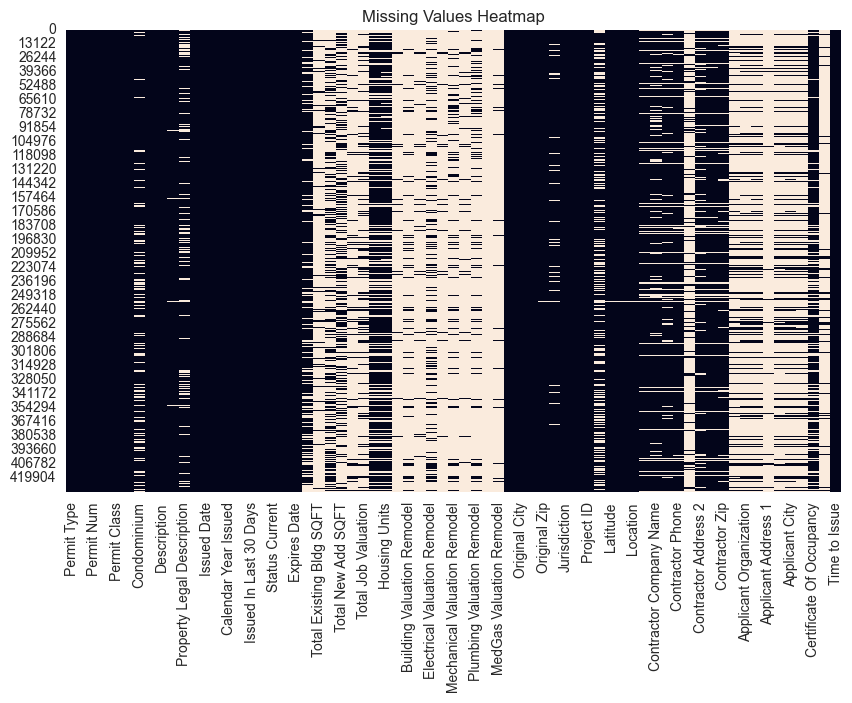

In [40]:
#Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

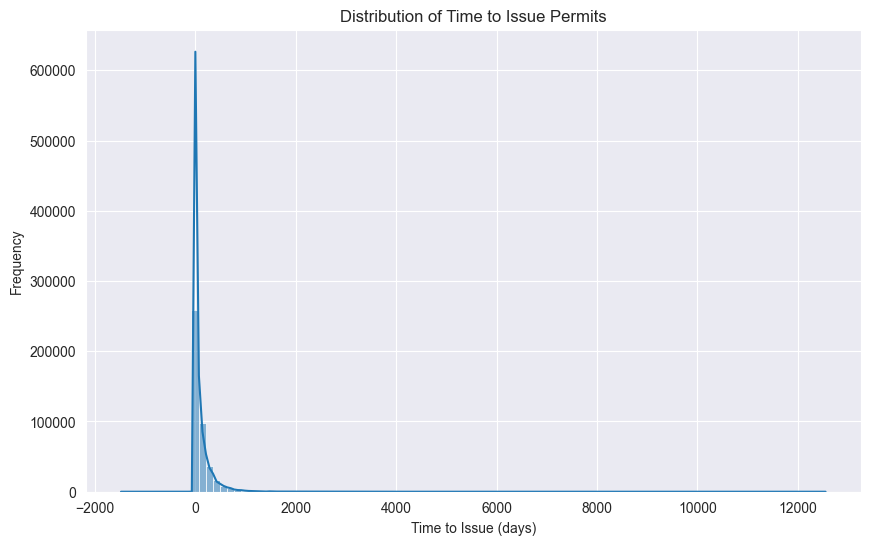

In [41]:
#Frequency distribution of Time to Issue permits

# Plot the data
plt.figure(figsize=(10, 6))
sns.histplot(df['Time to Issue'], bins=100, kde=True)
plt.title('Distribution of Time to Issue Permits')
plt.xlabel('Time to Issue (days)')
plt.ylabel('Frequency')
plt.show()

In [42]:
#Set threshold to remove columns with more than 70% missing values
missing_columns = list(missing_table[missing_table['Missing Values: %'] > 70].index)

#Display columns with missing values
print('We will remove %d columns'%len(missing_columns))
print('The columns to remove are \n %s'%missing_columns)

#Drop columns with missing values > 70% and which are not relevant to analysis
df.drop(columns = list(missing_columns),inplace=True)
df.drop(columns = ['Property Legal Description', 'Issued In Last 30 Days', 'Issuance Method', 'Remodel Repair SQFT', 'Total New Add SQFT',
                   'Number Of Floors', 'Housing Units', 'Original State', 'Council District', 'Link','Contractor Company Name',
                   'Contractor Full Name','Contractor Phone','Contractor Address 2','Contractor City','Contractor Zip',
                   'Condominium','TCAD ID','Contractor Trade','Certificate Of Occupancy','Master Permit Num'], inplace = True)

#Drop rows with NULL values
df = df.dropna()

We will remove 22 columns
The columns to remove are 
 ['Total Existing Bldg SQFT', 'Total Valuation Remodel', 'Total Job Valuation', 'Building Valuation', 'Building Valuation Remodel', 'Electrical Valuation', 'Electrical Valuation Remodel', 'Mechanical Valuation', 'Mechanical Valuation Remodel', 'Plumbing Valuation', 'Plumbing Valuation Remodel', 'MedGas Valuation', 'MedGas Valuation Remodel', 'Contractor Address 1', 'Applicant Full Name', 'Applicant Organization', 'Applicant Phone', 'Applicant Address 1', 'Applicant Address 2', 'Applicant City', 'Applicant Zip', 'Total Lot SQFT']


In [43]:
#Handling outliers

#Convert 'Time to Issue' column to numeric
df['Time to Issue'] = pd.to_numeric(df['Time to Issue'], errors='coerce')

#Ensure 'Time to Issue' is treated as a float32 column
df['Time to Issue'] = df['Time to Issue'].astype(np.float32)

#Filter rows where 'Time to Issue' is between 0 and 1000 inclusive
df = df[(df['Time to Issue'] >= 0) & (df['Time to Issue'] <= 1000)]

In [44]:
#Rows and columns after data pre-processing
df.shape

(361862, 26)

In [45]:
#Save the cleaned DataFrame back to a CSV file
cleaned_file_path = 'IssuedConstructionPermits.csv'
df.to_csv(r'D:\Summer 2024\DSCI 5260 - Business Process Analytics\Dataset\IssuedConstructionPermits.csv', index=False)

Exploratory Data Analysis

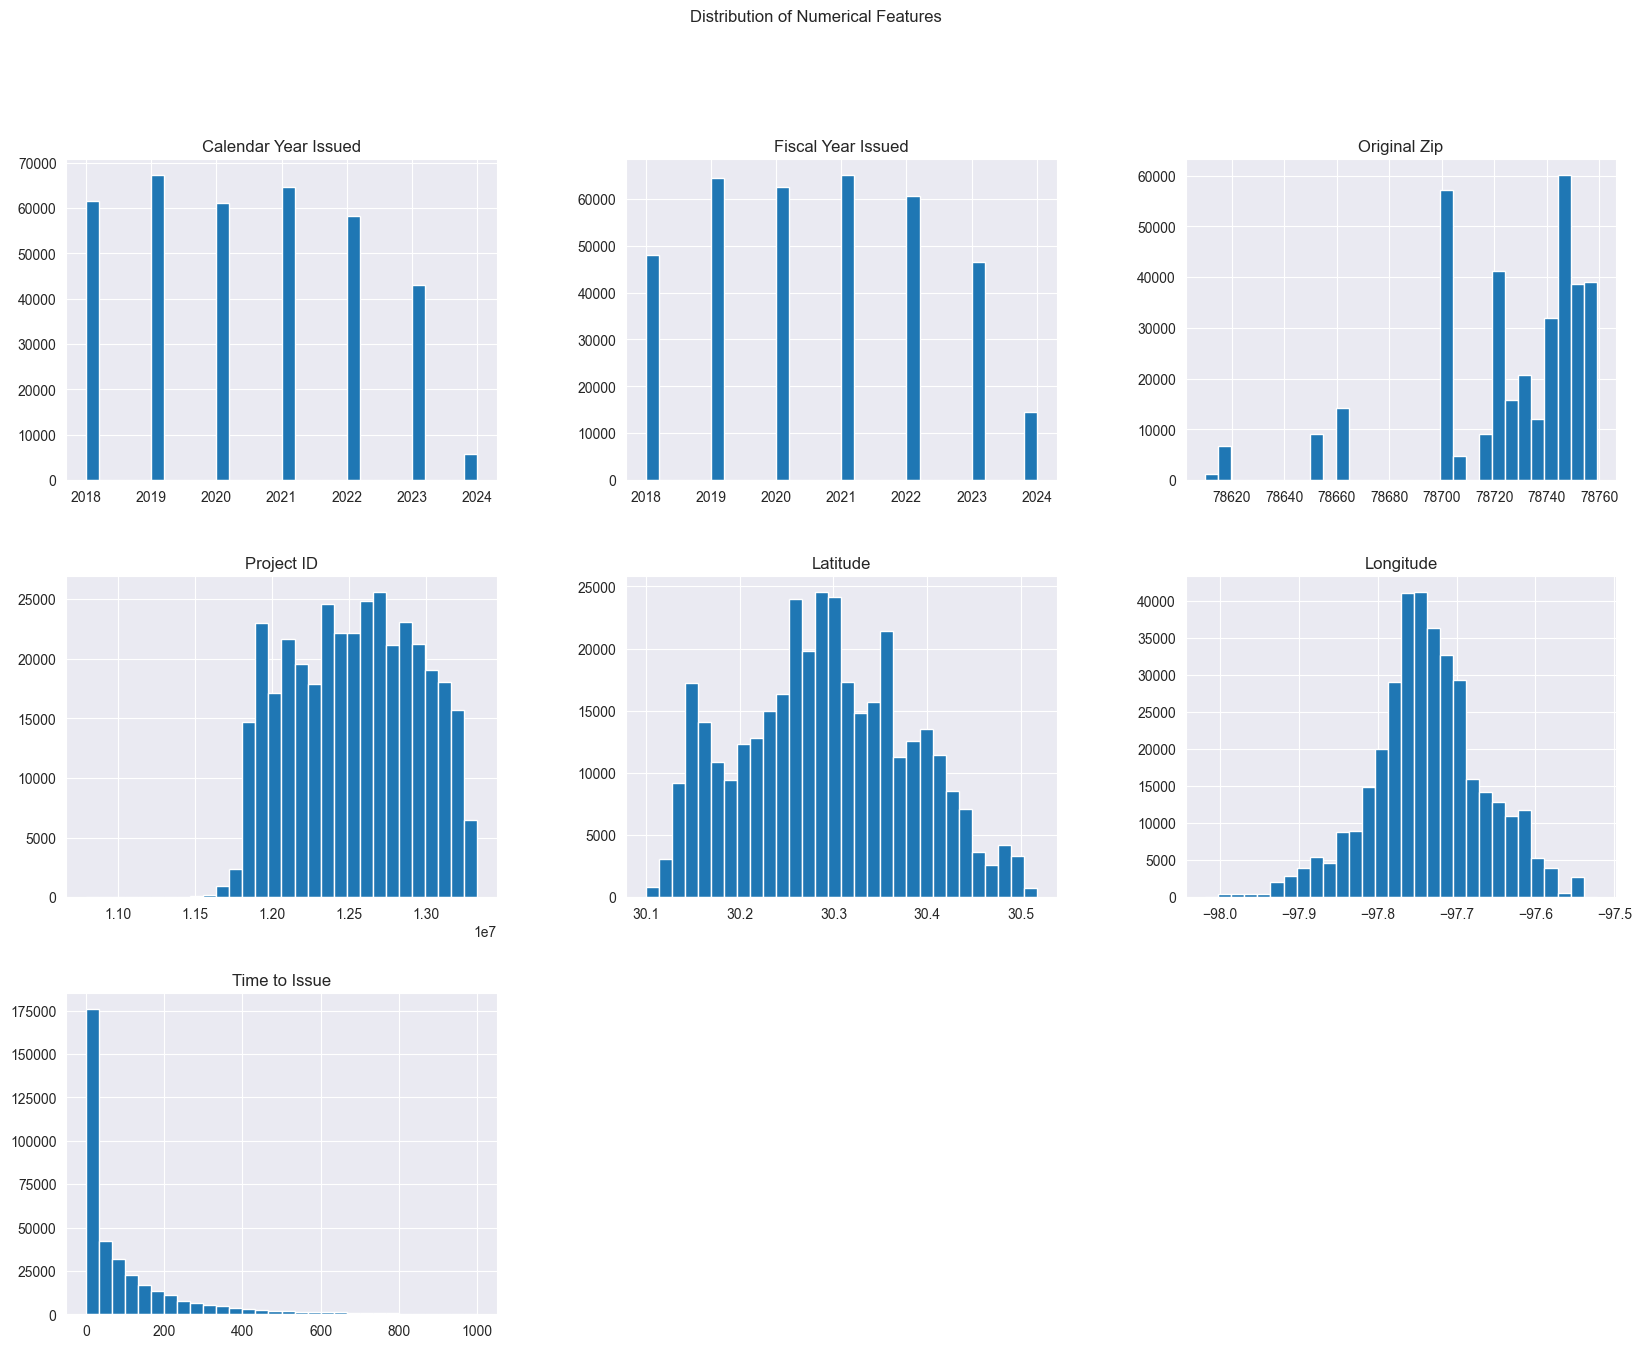

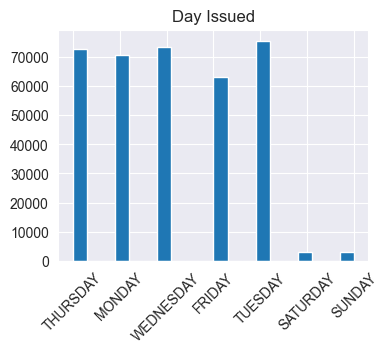

In [46]:
#Display the distribution of various features
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features].hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution of Numerical Features')
plt.show()

df['Day Issued'].hist(bins=20, figsize=(4,3))
plt.xticks(rotation=45)
plt.title('Day Issued')
plt.show()

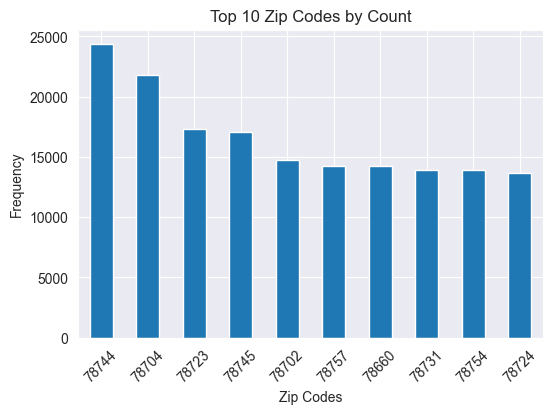

In [47]:
#Display Top 10 Zipcodes by Permit volume.

#Count the occurrences of each zip code
zip_counts = df['Original Zip'].value_counts().sort_values(ascending=False).head(10)

#Plot the counts using a bar plot
plt.figure(figsize=(6, 4))
ax = zip_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 10 Zip Codes by Count')
plt.xlabel('Zip Codes')
plt.ylabel('Frequency')

#Set x-axis labels as integers
ax.set_xticks(range(len(zip_counts)))
ax.set_xticklabels(zip_counts.index.astype(int), rotation=45)

plt.show()

Descriptive Data Analysis

1. Distribution of Permits issued by Permit Class

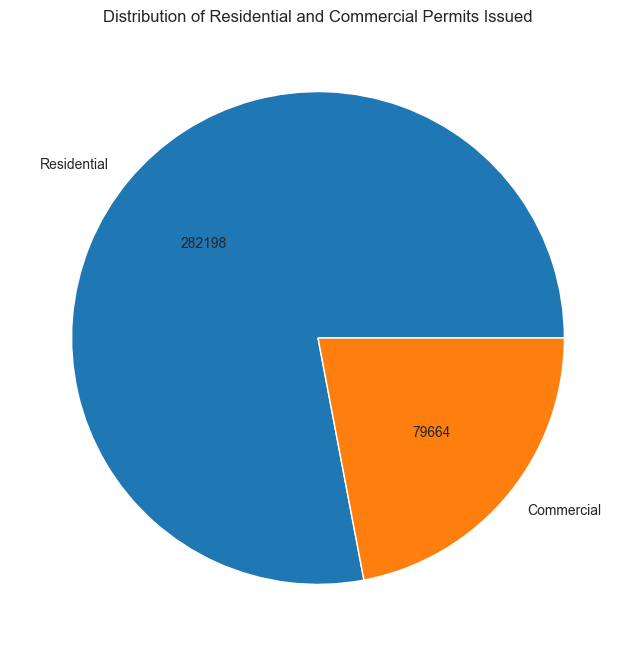

In [48]:
#Pie Chart representing the distribution of permits issued by permit class mapped.
df_pie = df['Permit Class Mapped'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(df_pie, labels=df_pie.index, autopct=lambda p: '{:.0f}'.format(p * sum(df_pie) / 100))

plt.title('Distribution of Residential and Commercial Permits Issued')
plt.show()

2. Trend of Permits applied and issued by year

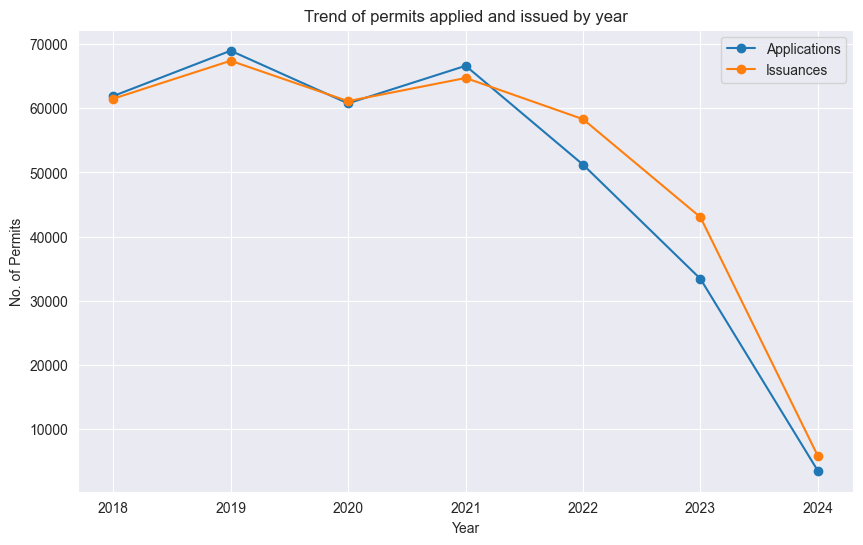

In [49]:
#Line chart showing the trend of permits issued by year

plt.figure(figsize=(10, 6))

new_df = df.copy()

#Calculating Application Year and Issue Year columns
new_df['Application Year'] = new_df['Applied Date'].dt.to_period('Y')
new_df['Issue Year'] = new_df['Issued Date'].dt.to_period('Y')

#Calculating permit volume for Application Year and Issue Year
application_counts = new_df['Application Year'].value_counts().sort_index()
issue_counts = new_df['Issue Year'].value_counts().sort_index()

#Filtering dataset for data later than 2018
application_counts = application_counts[application_counts.index >= '2018']
issue_counts = issue_counts[issue_counts.index >= '2018']

#Plotting the map
plt.plot(application_counts.index.to_timestamp(), application_counts.values, label='Applications',marker='o', )
plt.plot(issue_counts.index.to_timestamp(), issue_counts.values, label='Issuances', marker='o', )

plt.title('Trend of permits applied and issued by year')
plt.xlabel('Year')
plt.ylabel('No. of Permits')
plt.legend()
plt.show()

3. Distribution of permits issued by Geographical Location

In [50]:
#Group by lat/lon and count the occurrences
location_counts = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')

#Create a base map
m = folium.Map(location=[30.2672, -97.7431], zoom_start=5)

#Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

#Add the points to the marker cluster
for idx, row in location_counts.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Count: {row['count']}"
    ).add_to(marker_cluster)

#Save the map as an HTML file
m.save(r'D:\Summer 2024\DSCI 5260 - Business Process Analytics\Code\map_with_counts.html')

4. Issued permits count and Avg time taken to issue a permit by Permit Type

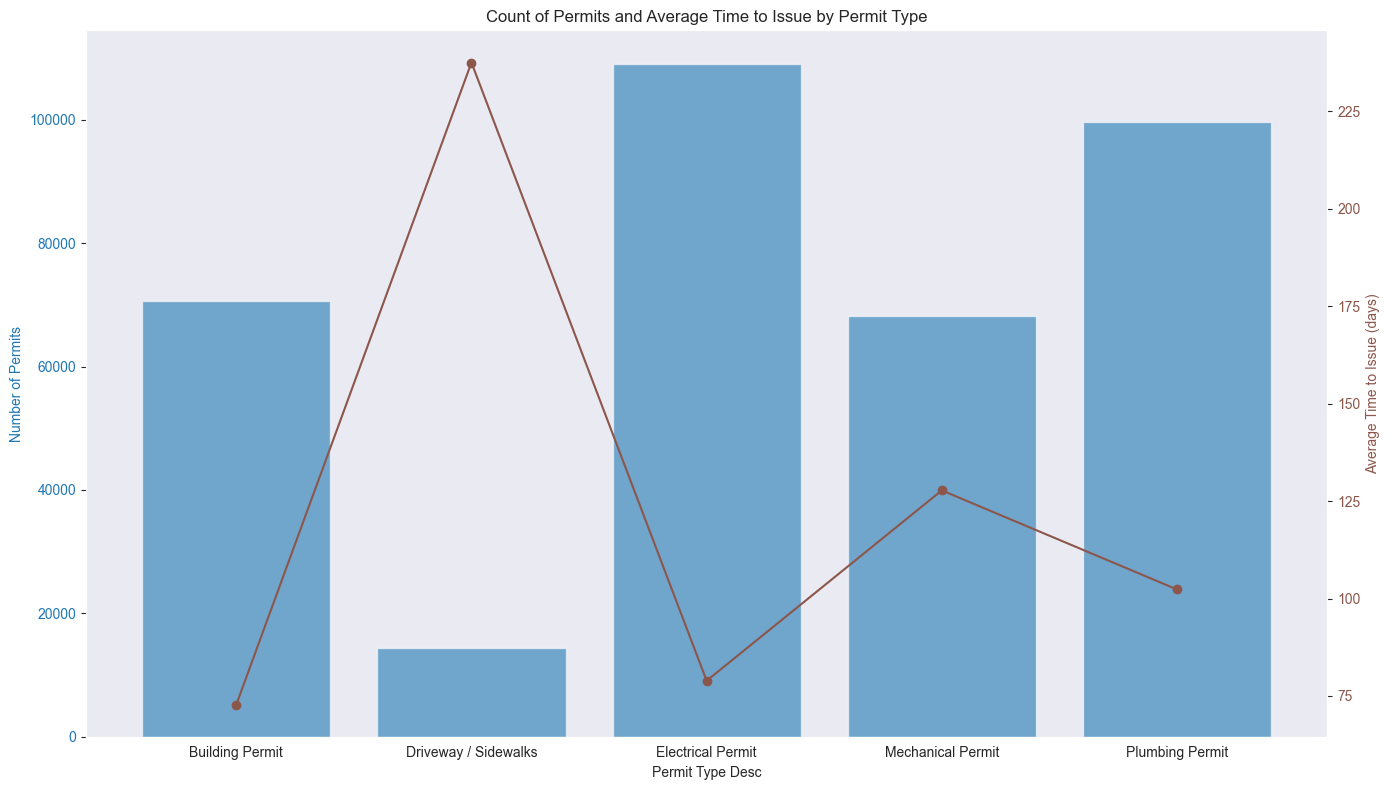

In [51]:
#Grouping the data by 'Permit Type' to calculate the number of permits and the average time taken
permit_stats = df.groupby('Permit Type Desc')['Time to Issue'].agg(['count', 'mean']).reset_index()
permit_stats.columns = ['Permit Type Desc', 'Number of Permits', 'Average Time to Issue']

#Creating the combination chart
fig, ax1 = plt.subplots(figsize=(14, 8))

#Plotting the number of permits as a bar plot
ax1.bar(permit_stats['Permit Type Desc'], permit_stats['Number of Permits'], color='#1f77b4', alpha=0.6)
ax1.set_xlabel('Permit Type Desc')
ax1.set_ylabel('Number of Permits', color='#1f77b4')
ax1.grid(False)
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.set_xticks(range(len(permit_stats['Permit Type Desc'])))  # Set tick positions
ax1.set_xticklabels(permit_stats['Permit Type Desc'], rotation=0)

#Creating a second y-axis to plot the average time to issue as a line plot
ax2 = ax1.twinx()
ax2.plot(permit_stats['Permit Type Desc'], permit_stats['Average Time to Issue'], color='#8c564b', marker='o')
ax2.set_ylabel('Average Time to Issue (days)', color='#8c564b')
ax2.grid(False)
ax2.tick_params(axis='y', labelcolor='#8c564b')

#Adding a title and show the plot
plt.title('Count of Permits and Average Time to Issue by Permit Type')
fig.tight_layout()
plt.show()

5. Distribution of Issued permits by Current Status

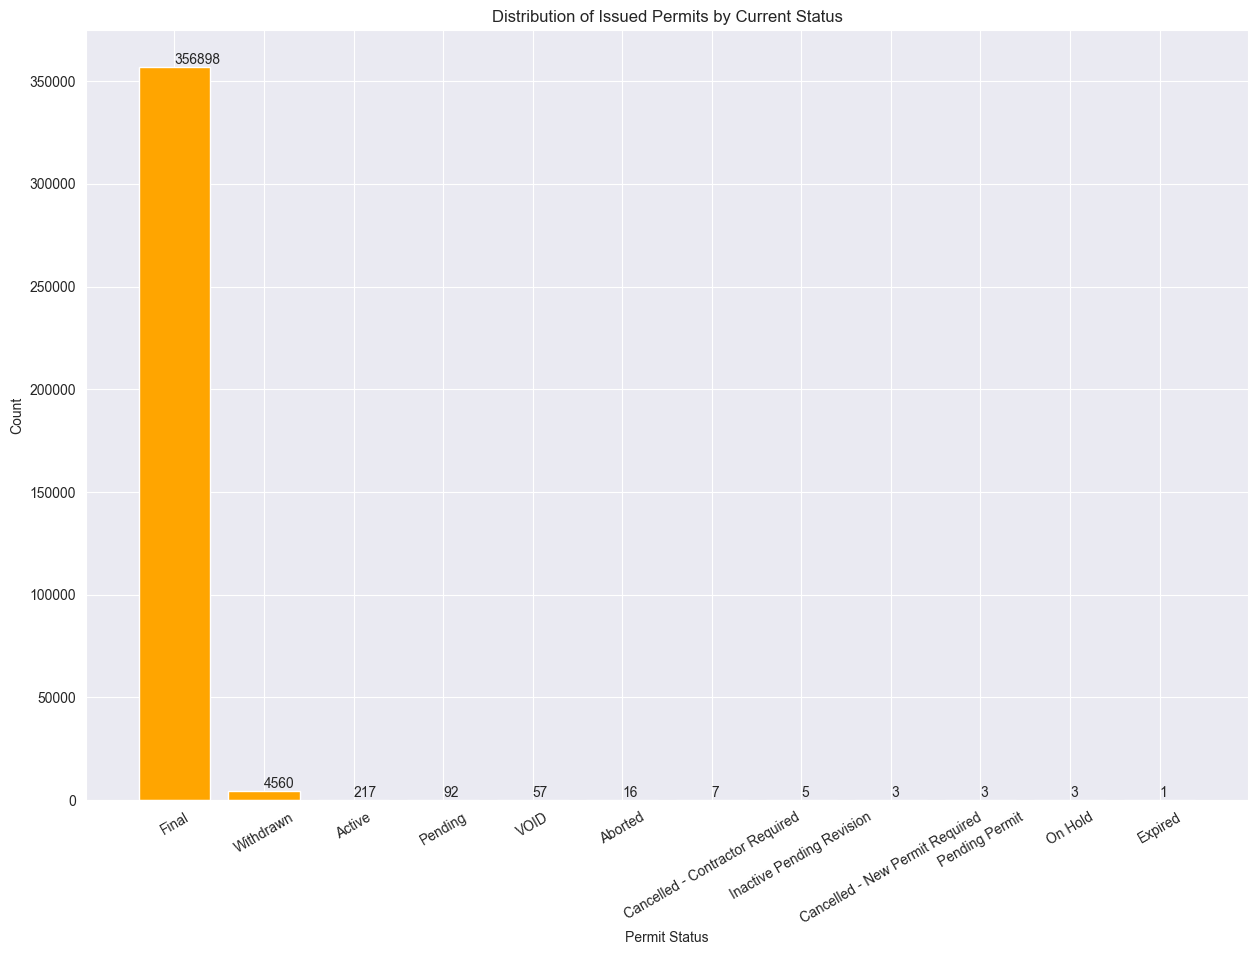

In [52]:
#Calculate the counts for each status
status_counts = df['Status Current'].value_counts()

#Create the bar chart
plt.figure(figsize=(15, 10))
bars = plt.bar(status_counts.index, status_counts, color='orange')

#Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

plt.title('Distribution of Issued Permits by Current Status')
plt.xlabel('Permit Status')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

6. Top 5 cities with most permits

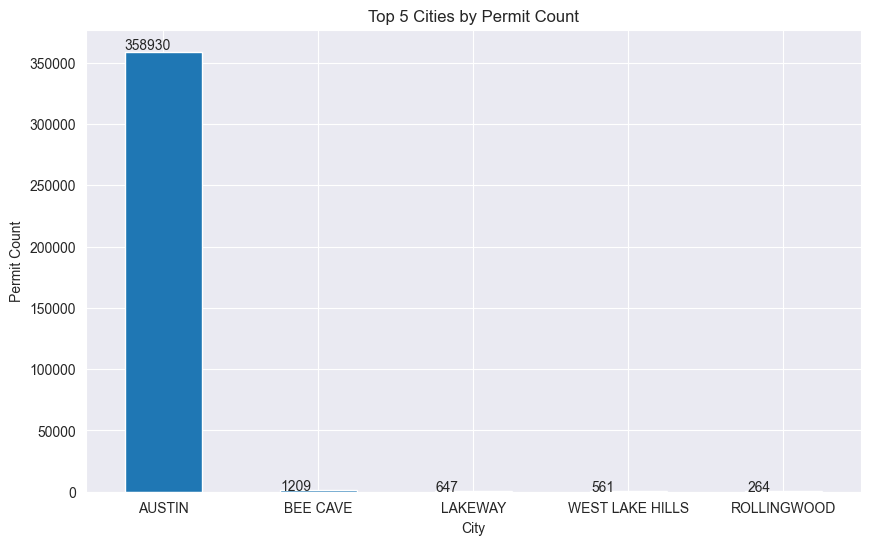

In [53]:
#Group by city and count the number of permits, then sort in descending order and get the top 5
top_5_cities = df.groupby('Original City').size().sort_values(ascending=False).head(5)

#Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = top_5_cities.plot(kind='bar')
plt.title('Top 5 Cities by Permit Count')
plt.xlabel('City')
plt.ylabel('Permit Count')
plt.xticks(rotation=0)

#Adding data labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Predictive Analytics

Prediction of Time to Issue

Actual vs. Encoded Values:
Permit Type:
  BP -> 0
  DS -> 1
  EP -> 2
  MP -> 3
  PP -> 4

Permit Class:
  C - Medical Gas -> 0
  C- 101 Single Family Houses -> 1
  C- 103 Two Family Bldgs -> 2
  C- 104 Three & Four Family Bldgs -> 3
  C- 105 Five or More Family Bldgs -> 4
  C- 106 Mixed Use -> 5
  C- 213 Hotels, Motels, & Tourist Cabins -> 6
  C- 214 Other Nonhousekeeping Shelter -> 7
  C- 318 Amusement, Social & Rec Bldgs -> 8
  C- 319 Churches and Othr Religious Bldgs -> 9
  C- 320 Industrial Bldgs -> 10
  C- 321 Pkg Garage Bldg & Open Deck -> 11
  C- 322 Service Station & Repair Garage -> 12
  C- 323 Hospital & Institutional Bldgs -> 13
  C- 324 Office, Bank & Professional Bldgs -> 14
  C- 325 Public Works & Utilities Bldgs -> 15
  C- 326 Schools & Other Educational Bldgs -> 16
  C- 327 Stores & Customer Services -> 17
  C- 328 Commercial Other Nonresident Bldg -> 18
  C- 329 Com Structures Other Than Bldg -> 19
  C- 437 Addn, Alter, Convn-NonRes -> 20
  C- 647 Demolition 3 and 4 F

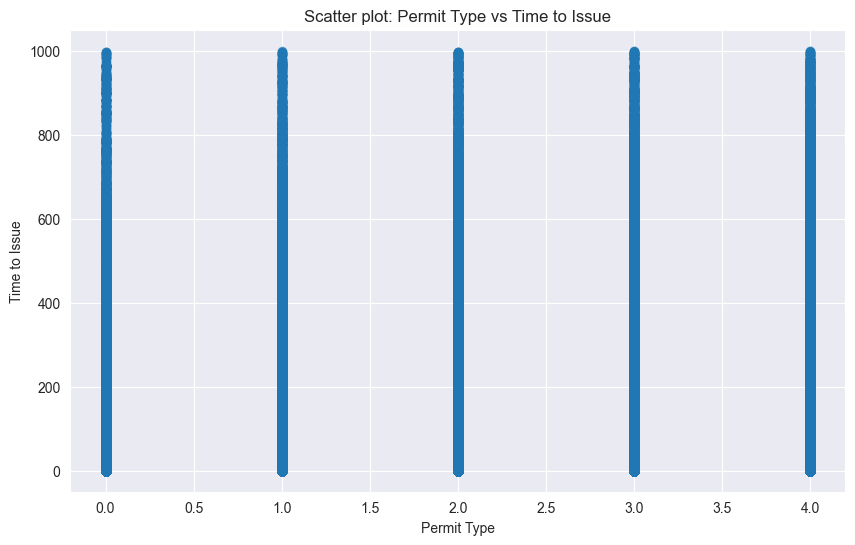

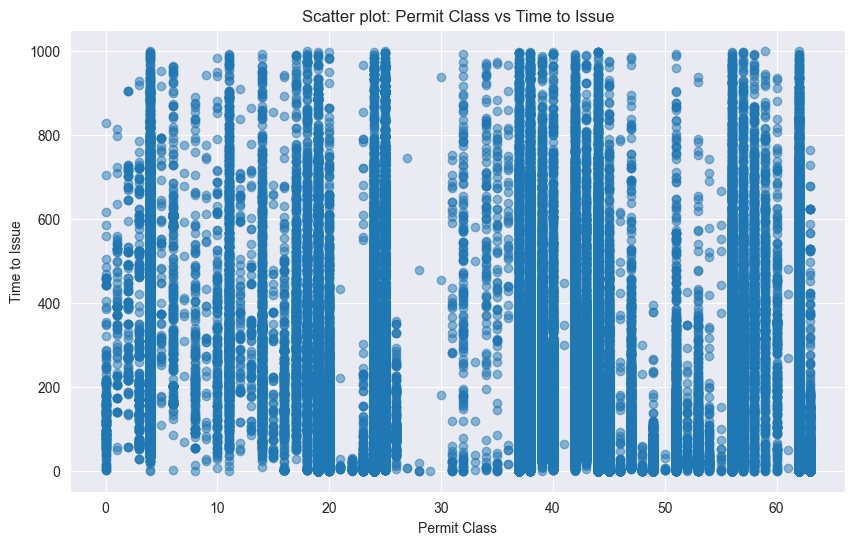

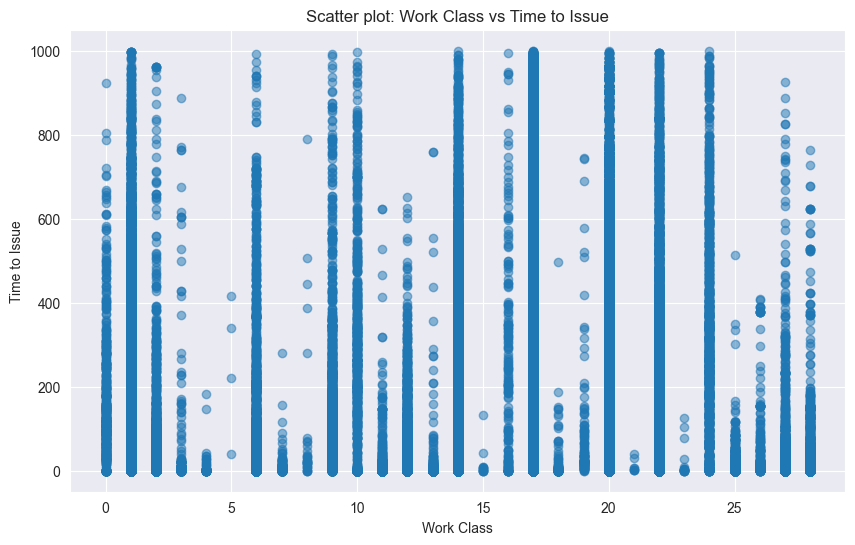

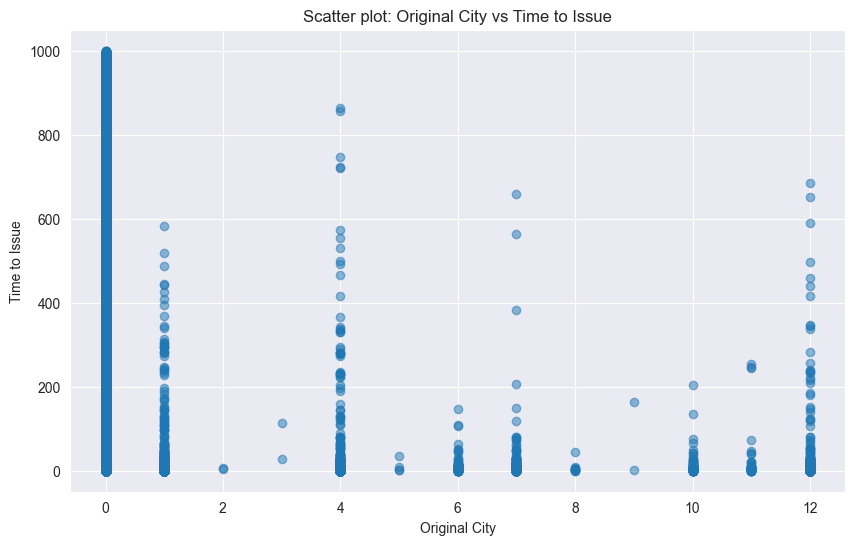

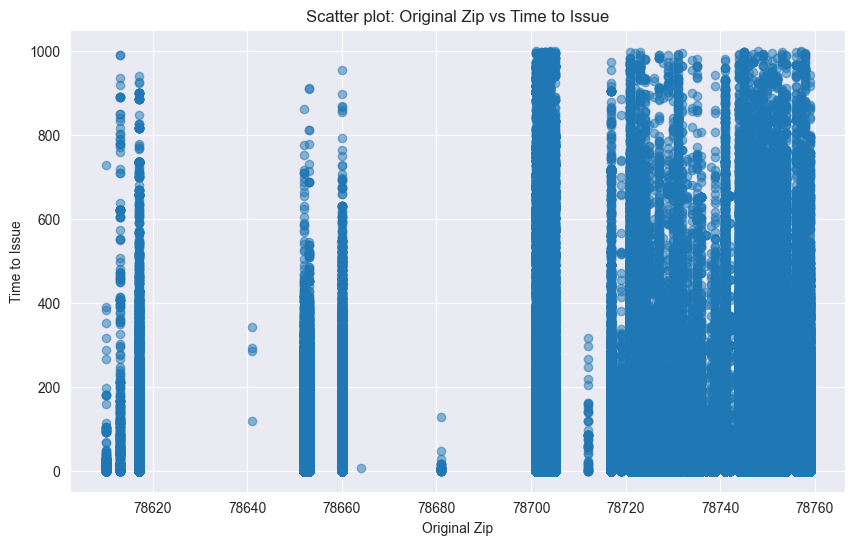

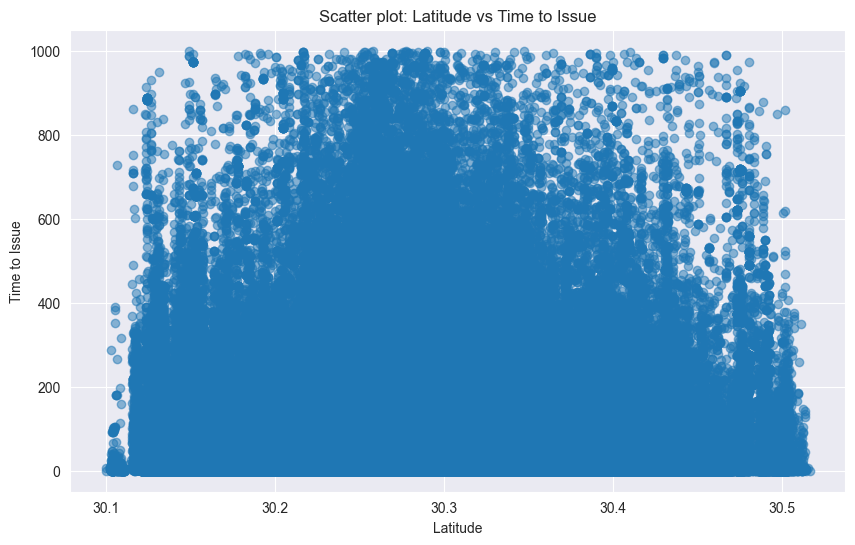

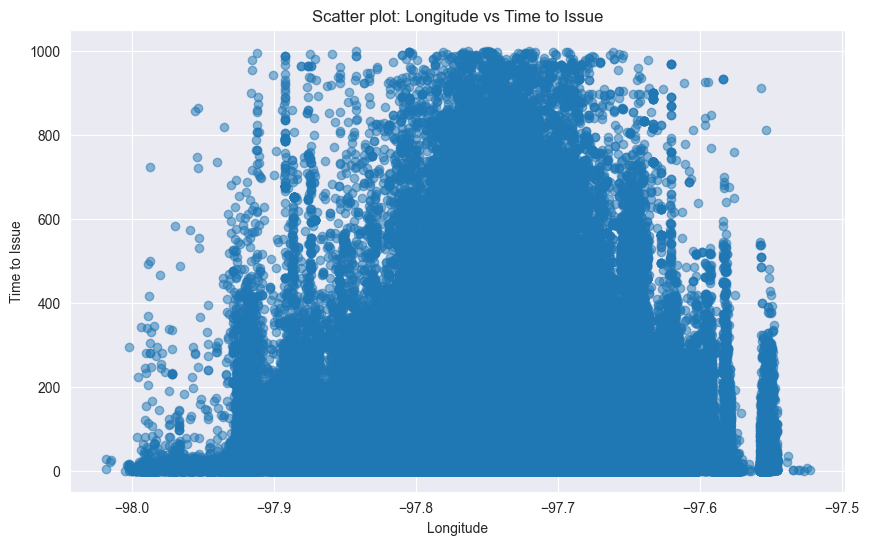

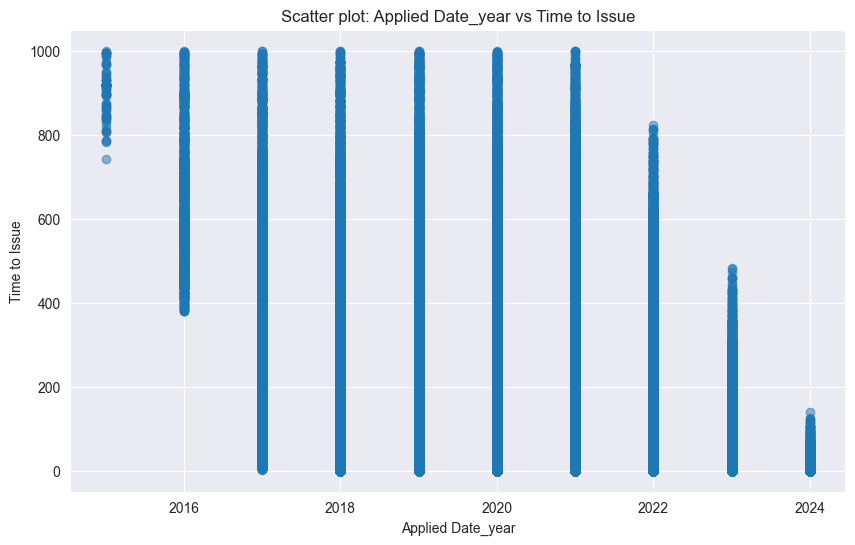

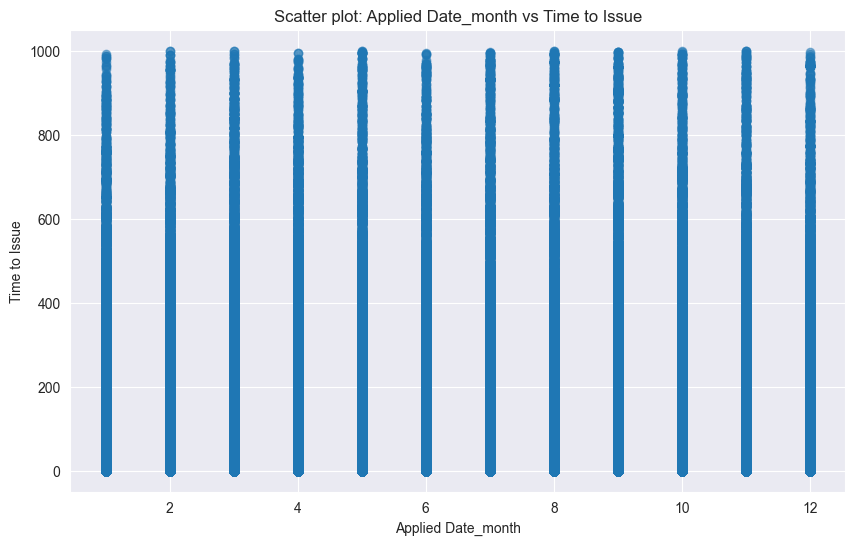

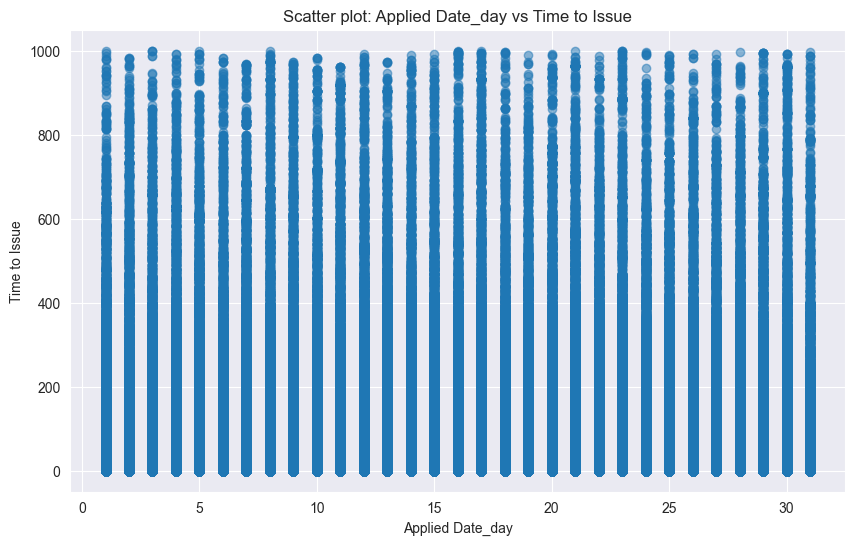

Random Forest Regressor Mean Absolute Error: 43.901924182033376
Random Forest Regressor R2 Score: 0.6636828100273333
Gradient Boosting Regressor Mean Absolute Error: 67.31386252689533
Gradient Boosting Regressor R2 Score: 0.44318630949325755
Sample Prediction: Permit Type: EP, Permit Class: Sign Permit, Work Class: Wall, Original City: AUSTIN, Original Zip: AUSTIN, Latitude: 30.27, Longitude: -97.75, Applied Date: Mar 28, 2019
Random Forest Regressor Predicted Time to Issue: 4.39 days
Gradient Boosting Regressor Predicted Time to Issue: 44.85240127618589 days


In [54]:
#Creating a new dataframe with a copy of the actual dataframe
new_df = df.copy()

#Creating new colums for Year, Month and Day for all datetime fields
for column in new_df.select_dtypes(include=['datetime64']).columns:
    new_df[column + '_year'] = new_df[column].dt.year
    new_df[column + '_month'] = new_df[column].dt.month
    new_df[column + '_day'] = new_df[column].dt.day
    new_df = new_df.drop(columns=[column])

#Handle missing values for numerical columns
imputer = SimpleImputer(strategy='mean')
numerical_cols = new_df.select_dtypes(include=['float64', 'int64']).columns
new_df[numerical_cols] = imputer.fit_transform(new_df[numerical_cols])

#Define the features to be used for training
features = ['Permit Type', 'Permit Class', 'Work Class', 'Original City', 'Original Zip', 'Latitude', 'Longitude', 'Applied Date_year', 'Applied Date_month', 'Applied Date_day']

#Encode categorical variables
label_encoders = {}
encoded_mappings = {}
for column in set(new_df.columns) & set(features):
    if new_df[column].dtype == 'object':  # only encode if it's a categorical variable
        le = LabelEncoder()
        new_df[column] = le.fit_transform(new_df[column])
        label_encoders[column] = le
        encoded_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

#Display actual vs encoded values for categorical variables
print("Actual vs. Encoded Values:")
for column, mapping in encoded_mappings.items():
    print(f"{column}:")
    for k, v in mapping.items():
        print(f"  {k} -> {v}")
    print()  # Adding a blank line for better separation

#Ensure all features are numerical and imputed
for column in new_df.columns:
    if new_df[column].isnull().any():
        new_df[column].fillna(new_df[column].mean(), inplace=True)

#Ensure there are no missing values
if new_df.isnull().any().any():
    print("There are still missing values in the dataset")

#Feature selection (assuming 'Time to Issue' is the target variable)
X = new_df[features]
y = new_df['Time to Issue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scatter plots of features vs predicted variable
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(new_df[feature], y, alpha=0.5)
    plt.title(f'Scatter plot: {feature} vs Time to Issue')
    plt.xlabel(feature)
    plt.ylabel('Time to Issue')
    plt.show()

#Initialize the models
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

#Train and evaluate the models
evaluation_metrics = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evaluation_metrics[model_name] = {'MAE': mae, 'R2 Score': r2}
    print(f'{model_name} Mean Absolute Error: {mae}')
    print(f'{model_name} R2 Score: {r2}')

#Predict function for each model
def predict_time_to_issue(model, permit_type, permit_class, work_class, original_city, original_zip, latitude, longitude, applied_date):
    
    unknown_code = -1

    applied_date = pd.to_datetime(applied_date)
    applied_year = applied_date.year
    applied_month = applied_date.month
    applied_day = applied_date.day

    input_data = []
    input_values = [permit_type, permit_class, work_class, original_city, original_zip, latitude, longitude, applied_year, applied_month, applied_day]
    
    for column, value in zip(features, input_values):
        if column in label_encoders:
            if value in label_encoders[column].classes_:
                value = label_encoders[column].transform([value])[0]
            else:
                value = unknown_code
        input_data.append(value)

    input_data = pd.DataFrame([input_data], columns=features)
    return model.predict(input_data)[0]

print('Sample Prediction: Permit Type: EP, Permit Class: Sign Permit, Work Class: Wall, Original City: AUSTIN, Original Zip: AUSTIN, Latitude: 30.27, Longitude: -97.75, Applied Date: Mar 28, 2019')

#Example prediction using each model
for model_name, model in models.items():
    try:
        example_prediction = predict_time_to_issue(model, 'EP', 'Sign Permit', 'Wall', 'AUSTIN', 78701, 30.2650978, -97.74556676, '3/28/2019')
        print(f'{model_name} Predicted Time to Issue: {example_prediction} days')
    except ValueError as e:
        print(f'Error with {model_name}: {e}')


Text Classification

In [55]:
#Creating a new dataframe with a copy of the actual dataframe
new_df = df.copy()

#Preprocess the text data
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # Lowercase text
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

new_df['Description'] = new_df['Description'].apply(preprocess_text)

#Encode the target labels
label_encoder = LabelEncoder()
new_df['Permit Type Encoded'] = label_encoder.fit_transform(new_df['Permit Type'])

#Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(new_df['Description'])
y = new_df['Permit Type Encoded']

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,C=0.05),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

#Train, predict and evaluate each model
for model_name, model in models.items():
    print(f"Results for {model_name}:")

    #Train the model
    model.fit(X_train, y_train)

    #Make predictions and evaluate the model
    y_pred = model.predict(X_test)
    target_names = label_encoder.inverse_transform(model.classes_)
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    #Sample descriptions
    new_descriptions = ["Install irrigation system to duplex", "Remove and replace 5 ton split system Split-008", "Siding replacement on the existing single family residence."]
    new_descriptions = [preprocess_text(desc) for desc in new_descriptions]
    new_X = vectorizer.transform(new_descriptions)
    predicted_permit_types_encoded = model.predict(new_X)

    #Decode the predicted labels to original permit type names
    predicted_permit_types = label_encoder.inverse_transform(predicted_permit_types_encoded)
    print("new_descriptions",new_descriptions)
    print("Predicted Permit Types for new descriptions:", predicted_permit_types)
    print("\n" + "="*50 + "\n")

Results for Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

          BP       0.50      0.50      0.50     14131
          DS       1.00      0.99      0.99      2880
          EP       0.59      0.73      0.65     21735
          MP       0.58      0.55      0.56     13556
          PP       0.77      0.61      0.68     20071

    accuracy                           0.63     72373
   macro avg       0.69      0.67      0.68     72373
weighted avg       0.64      0.63      0.63     72373

Accuracy: 0.6261727439791083
new_descriptions ['install irrigation system to duplex', 'remove and replace ton split system split', 'siding replacement on the existing single family residence']
Predicted Permit Types for new descriptions: ['PP' 'MP' 'BP']


Results for Naive Bayes:
Classification Report:
               precision    recall  f1-score   support

          BP       0.37      0.77      0.50     14131
          DS       1.00      1.00      

Anomaly Detection

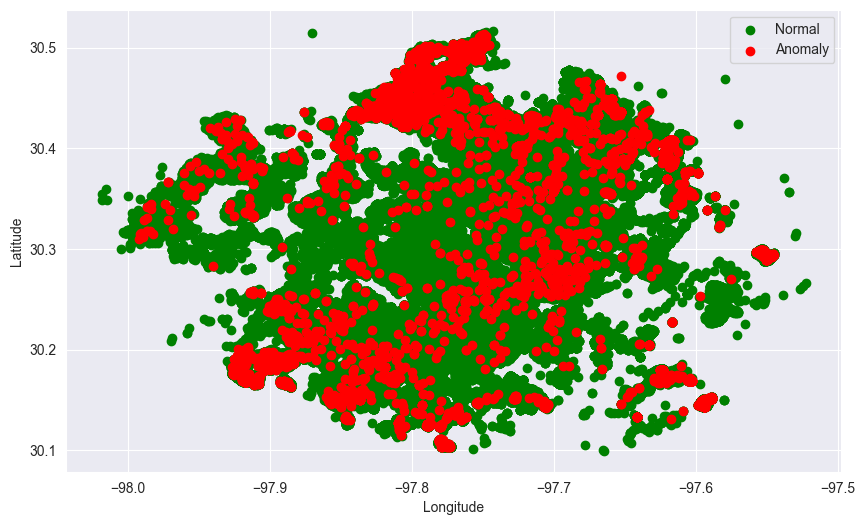

Anomaly detection completed and results saved to: D:\Summer 2024\DSCI 5260 - Business Process Analytics\Dataset\New Anomalies.csv


In [56]:
#Creating a new dataframe with a copy of the actual dataframe
new_df = df.copy()

#Fill NaNs with a specific date (e.g., the mean date)
mean_applied_date = new_df['Applied Date'].mean()
mean_issued_date = new_df['Issued Date'].mean()
mean_completed_date = new_df['Completed Date'].mean()

new_df['Applied Date'] = new_df['Applied Date'].fillna(mean_applied_date)
new_df['Issued Date'] = new_df['Issued Date'].fillna(mean_issued_date)
new_df['Completed Date'] = new_df['Completed Date'].fillna(mean_completed_date)

#Convert dates to timestamps using .apply() method, ensuring no floats are present
new_df['Applied Date Timestamp'] = new_df['Applied Date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
new_df['Issued Date Timestamp'] = new_df['Issued Date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
new_df['Completed Date Timestamp'] = new_df['Completed Date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

#Ensure no NaNs remain in timestamp columns
new_df['Applied Date Timestamp'] = new_df['Applied Date Timestamp'].fillna(new_df['Applied Date Timestamp'].mean())
new_df['Issued Date Timestamp'] = new_df['Issued Date Timestamp'].fillna(new_df['Issued Date Timestamp'].mean())
new_df['Completed Date Timestamp'] = new_df['Completed Date Timestamp'].fillna(new_df['Completed Date Timestamp'].mean())

#Convert 'Permit Type' to numerical values
le = LabelEncoder()
new_df['Permit Type'] = le.fit_transform(new_df['Permit Type'])

#Select numeric features
features = ['Latitude', 'Longitude', 'Applied Date Timestamp', 'Issued Date Timestamp', 'Completed Date Timestamp', 'Permit Type']
X = new_df[features]  # The missing values have already been handled

#Apply Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
new_df['anomaly'] = model.fit_predict(X)

#Evaluate the results
anomalies = new_df[new_df['anomaly'] == -1]
normal = new_df[new_df['anomaly'] == 1]

# Plotting results (example)
plt.figure(figsize=(10, 6))
plt.scatter(normal['Longitude'], normal['Latitude'], c='green', label='Normal')
plt.scatter(anomalies['Longitude'], anomalies['Latitude'], c='red', label='Anomaly')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

#Save anomalies to a new file
anomalies = new_df[new_df['anomaly'] == -1].copy()

#Convert timestamps back to datetime for anomalies
anomalies['Applied Date'] = pd.to_datetime(anomalies['Applied Date Timestamp'], unit='s')
anomalies['Issued Date'] = pd.to_datetime(anomalies['Issued Date Timestamp'], unit='s')
anomalies['Completed Date'] = pd.to_datetime(anomalies['Completed Date Timestamp'], unit='s')

#Save anomalies to a new file
output_path = r'D:\Summer 2024\DSCI 5260 - Business Process Analytics\Dataset\New Anomalies.csv'
anomalies.to_csv(output_path, index=False)

#Evaluate the results
new_df['anomaly_label'] = new_df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

print("Anomaly detection completed and results saved to:", output_path)


Anamoly detection in Time to issue a permit using Isolation Forest

Number of anomalies detected with contamination=0.01: 21


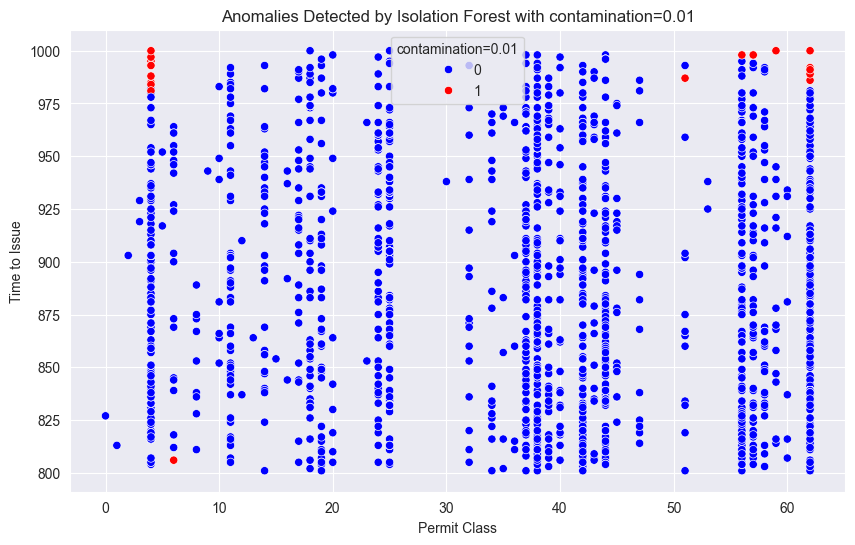

Number of anomalies detected with contamination=0.05: 102


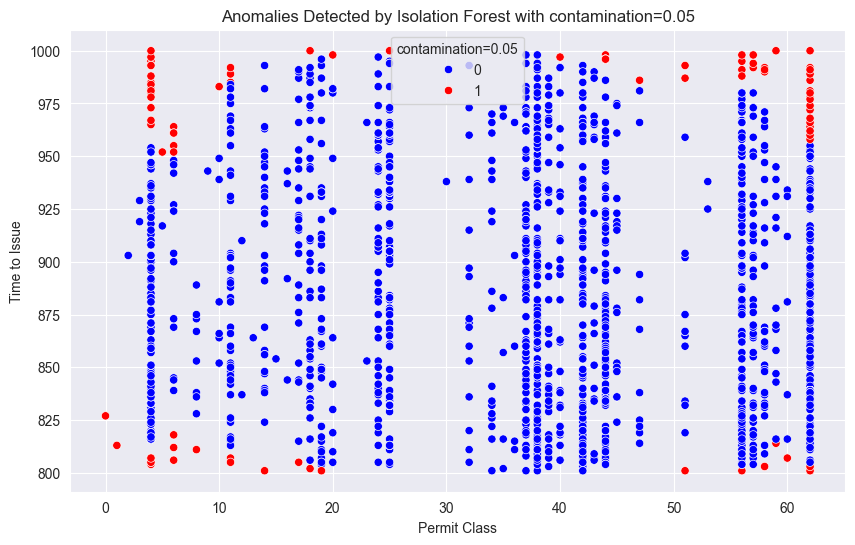

Number of anomalies detected with contamination=0.1: 203


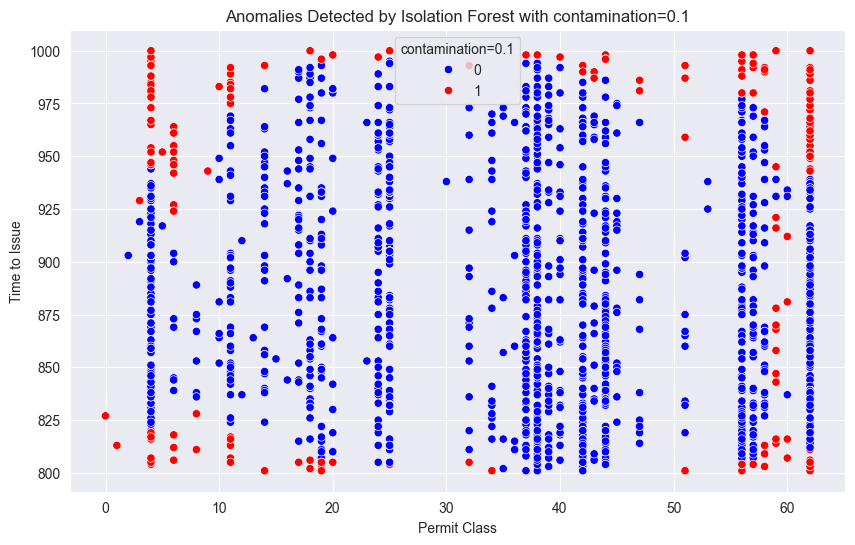

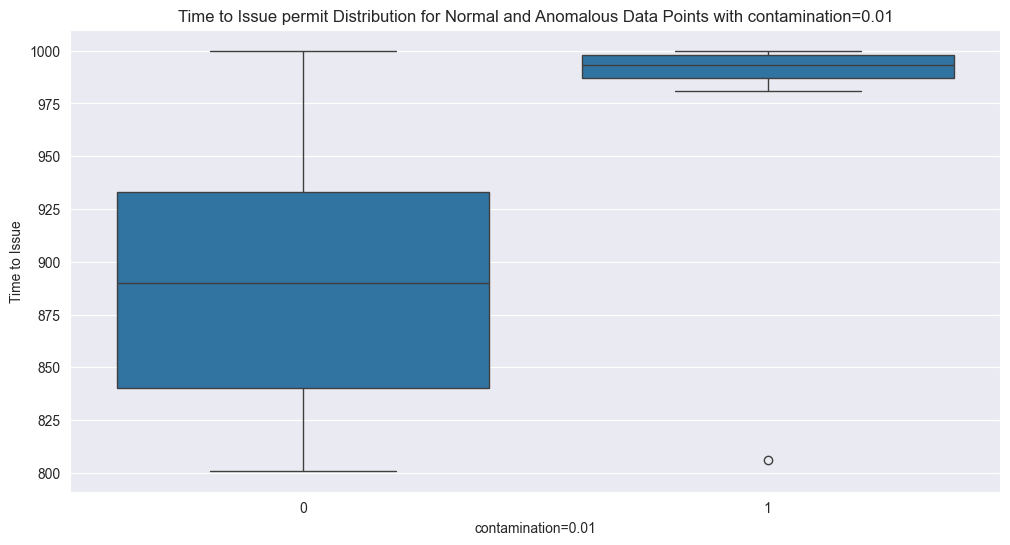

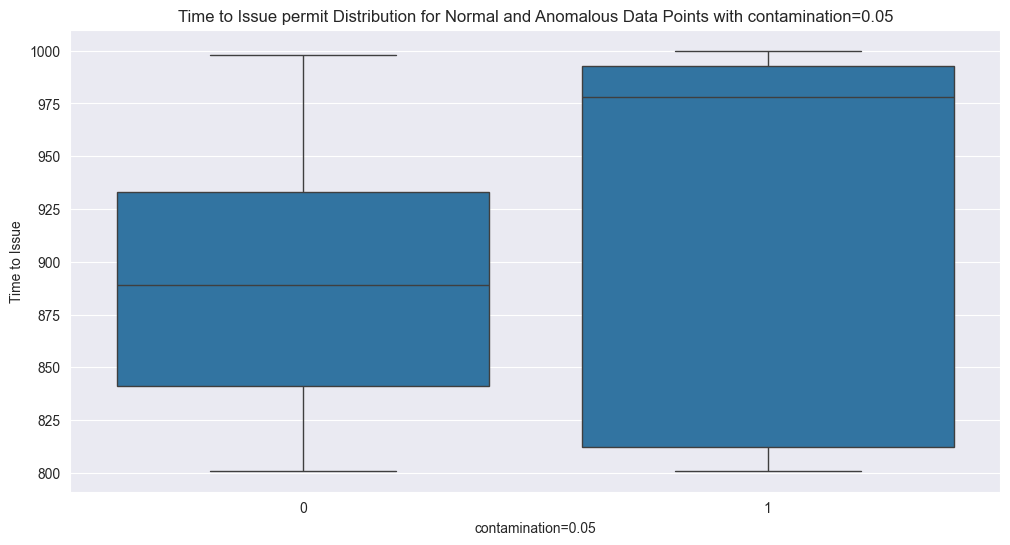

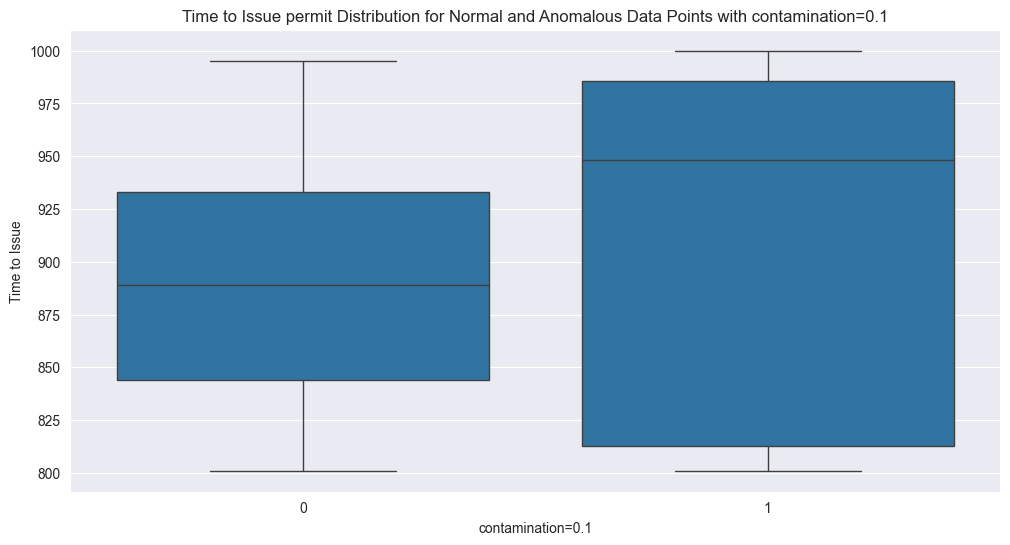

Sample anomalies with contamination=0.01:
    Permit Type      Permit Type Desc      Permit Num Permit Class Mapped  \
209          BP       Building Permit  2017-054885 BP          Commercial   
210          BP       Building Permit  2017-054887 BP          Commercial   
213          BP       Building Permit  2017-055087 BP          Commercial   
214          BP       Building Permit  2017-055088 BP          Commercial   
264          DS  Driveway / Sidewalks  2017-106645 DS         Residential   

     Permit Class Work Class             Project Name  \
209             4        New  2511 W BRAKER LN BLDG 6   
210             4        New  2511 W BRAKER LN BLDG 1   
213             4        New  10301 BURNET RD BLDG 1A   
214             4        New  10301 BURNET RD BLDG 1B   
264            57        New           2208 E 13TH ST   

                                           Description Applied Date  \
209         NEW CONTRUCTION OF MULIT - FAMILY -PHASE 6   2016-11-16   
210  New A

In [61]:
#Preprocessing the data
#Checking for the existence of 'Time to Issue' column
if 'Time to Issue' not in df.columns:
    print("Error: 'Issue Time' column not found in the DataFrame. Please check your data.")
    # Handle the missing column appropriately, e.g., create it or adjust your analysis
else:
    #Preprocess the data
    data_cleaned = df.dropna(subset=['Permit Class','Time to Issue']) # Define data_cleaned here so it's accessible outside the else block
    le = LabelEncoder()
    data_cleaned['Permit Class'] = le.fit_transform(data_cleaned['Permit Class'])

    #Define a condition: focus on permits with issue time greater than 800 days
    condition = data_cleaned['Time to Issue'] > 800

    #Ensure subset_data is a definite copy and reindex it
    subset_data = data_cleaned[condition].copy()
    subset_data.reset_index(drop=True, inplace=True)  # Reset index to ensure proper alignment

    #Select features - Verify these columns exist in your DataFrame
    features = ['Permit Class', 'Time to Issue']  # Adjust based on your dataset and available columns
    X = subset_data[features].fillna(0)  # Handle missing values


#Function to apply Isolation Forest with different contamination values
def apply_isolation_forest(X, contamination):
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    iso_forest.fit(X)
    return iso_forest.predict(X)

#Apply Isolation Forest with different contamination values
contamination_values = [0.01, 0.05, 0.1]
results = {f'contamination={c}': apply_isolation_forest(X, c) for c in contamination_values}

#Explicitly declaring dtype and using .loc to avoid SettingWithCopyWarning
for key, value in results.items():
    subset_data.loc[:, key] = value.astype(int)  # Ensuring value is of type int

#Map predictions to anomaly labels using .loc and ensure dtype compatibility
for key in results.keys():
    # Apply mapping and explicitly cast to int to avoid FutureWarning
    subset_data.loc[:, key] = subset_data[key].map({1: 0, -1: 1}).astype(int)

#Analyze and visualize the results
for key in results.keys():
    num_anomalies = subset_data[key].sum()
    print(f"Number of anomalies detected with {key}: {num_anomalies}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=subset_data, x='Permit Class', y='Time to Issue', hue=key, palette=['blue', 'red'])
    plt.title(f'Anomalies Detected by Isolation Forest with {key}')
    plt.show()

#Box plot for Time to Issue
for key in results.keys():
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=key, y='Time to Issue', data=subset_data)
    plt.title(f'Time to Issue permit Distribution for Normal and Anomalous Data Points with {key}')
    plt.show()

#Investigate specific anomalies
for key in results.keys():
    print(f"Sample anomalies with {key}:")
    print(subset_data[subset_data[key] == 1].head())

    #Mean Issue Time comparison
    print(f"Mean issue time for normal permits with {key}: {subset_data[subset_data[key] == 0]['Time to Issue'].mean()}")
    print(f"Mean issue time for anomalous permits with {key}: {subset_data[subset_data[key] == 1]['Time to Issue'].mean()}")

Forecast of Permit Applications

Dataset Load & Pre-Processing

In [58]:
#Read the csv file into a dataframe
df_ts = pd.read_csv(r'D:\Summer 2024\DSCI 5260 - Business Process Analytics\Dataset\Issued_Construction_Permits.csv',low_memory=False)

#Creating new column for Applied Year
df_ts['Applied Date'] = pd.to_datetime(df_ts['Applied Date'])
df_ts['Applied Year'] = df_ts['Applied Date'].dt.year

#Drop columns with missing values more than 70%
missing_values = df_ts.isnull().sum()
missing_percentage = (missing_values/len(df_ts))*100
missing_table = pd.concat([missing_values, missing_percentage,], axis = 1)
missing_columns = list(missing_table[missing_table[1] > 70].index)
print('We will remove %d columns'%len(missing_columns))
print('The columns to remove are \n %s'%missing_columns)
df_ts.drop(columns = list(missing_columns),inplace=True)

#Drop columns which are not relevant to analysis
df_ts.drop(columns = ['Property Legal Description', 'Issued In Last 30 Days', 'Issuance Method', 'Number Of Floors', 'Housing Units', 'Original State', 
                   'Council District', 'Link','Contractor Company Name', 'Contractor Full Name','Contractor Phone','Contractor Address 2',
                   'Contractor City','Contractor Zip', 'Condominium','TCAD ID','Contractor Trade','Certificate Of Occupancy','Master Permit Num'], inplace = True)

#Drop rows with NaN values
df_ts = df_ts.dropna()

We will remove 23 columns
The columns to remove are 
 ['Total Existing Bldg SQFT', 'Remodel Repair SQFT', 'Total New Add SQFT', 'Total Valuation Remodel', 'Building Valuation', 'Building Valuation Remodel', 'Electrical Valuation', 'Electrical Valuation Remodel', 'Mechanical Valuation', 'Mechanical Valuation Remodel', 'Plumbing Valuation', 'Plumbing Valuation Remodel', 'MedGas Valuation', 'MedGas Valuation Remodel', 'Contractor Address 1', 'Applicant Full Name', 'Applicant Organization', 'Applicant Phone', 'Applicant Address 1', 'Applicant Address 2', 'Applicant City', 'Applicant Zip', 'Total Lot SQFT']


In [59]:
df_ts.shape

(1043405, 27)

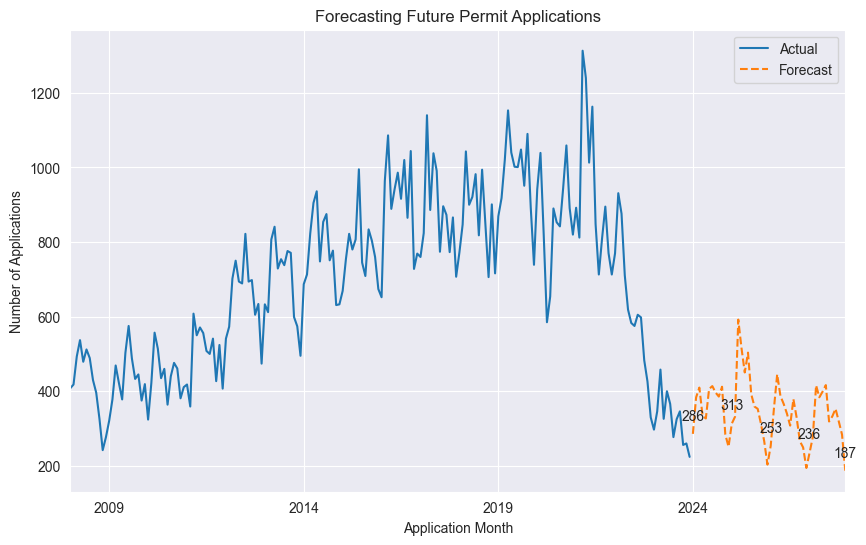

In [60]:
#Filtering forecast data to retain only data from 2008 to 2023
df_fc = df_ts[(df_ts['Applied Year'] > 2007) & (df_ts['Applied Year'] < 2024)]
new_df = df_fc.copy()

#Creating index on Applied Date
new_df.set_index('Applied Date', inplace=True)

#Calculating monthly applications count
monthly_applications = new_df.resample('ME').size()

#Time series forecasting
model = ExponentialSmoothing(monthly_applications, seasonal='add', seasonal_periods=48)
fit = model.fit()
forecast = fit.forecast(48)

#Plotting
plt.figure(figsize=(10, 6))  # Set figure size at the beginning of plotting
actual_plot = monthly_applications.plot(label='Actual')
forecast_plot = forecast.plot(label='Forecast', style='--')  

#Adding data labels for forecast data at significant points
points_to_label = [0, len(forecast)//4, len(forecast)//2, 3*len(forecast)//4, len(forecast)-1]  # Indexes for start, quarter, mid, three-quarter, and end
for idx in points_to_label:
    plt.annotate(f"{forecast.iloc[idx]:.0f}", (forecast.index[idx], forecast.iloc[idx]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Forecasting Future Permit Applications')
plt.xlabel('Application Month')
plt.ylabel('Number of Applications')
plt.legend()
plt.show()